## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->

Ini adalah Dr. Ignaz Semmelweis, seorang dokter Hongaria yang lahir pada tahun 1818 dan aktif di Rumah Sakit Umum Wina. Jika Dr. Semmelweis terlihat bermasalah, itu mungkin karena dia memikirkan *demam persalinan*: Penyakit mematikan yang menyerang wanita yang baru saja melahirkan. Dia memikirkan hal itu karena pada awal 1840-an di Rumah Sakit Umum Wina, sebanyak 10% wanita melahirkan mati karenanya. Dia memikirkannya karena dia tahu penyebab demam nifas: Ini adalah tangan yang terkontaminasi dari dokter yang melahirkan bayi. Dan mereka tidak akan mendengarkannya dan mencuci tangan mereka!

Dalam buku catatan ini, kita akan menganalisis ulang data yang membuat Semmelweis menemukan pentingnya mencuci tangan. Mari kita mulai dengan melihat data yang membuat Semmelweis menyadari bahwa ada yang salah dengan prosedur di Rumah Sakit Umum Wina.

In [1]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths

Tabel di atas menunjukkan jumlah wanita yang melahirkan di dua klinik di Rumah Sakit Umum Wina untuk tahun 1841 hingga 1846. Anda akan melihat bahwa melahirkan sangat berbahaya; sejumlah wanita yang mengkhawatirkan meninggal akibat persalinan, kebanyakan dari mereka karena demam saat melahirkan.

Kita melihat ini lebih jelas jika kita melihat *proporsi kematian* dari jumlah wanita yang melahirkan. Mari kita memperbesar proporsi kematian di Klinik 1.

In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


## 3. Death at the clinics

Jika kita sekarang plotting proporsi kematian di klinik 1 dan klinik 2 kita akan melihat pola yang aneh ...

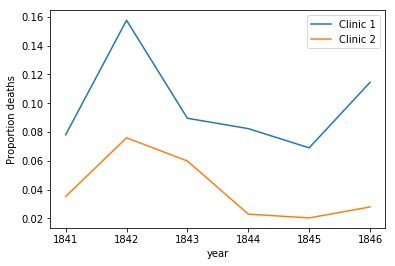

In [29]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x='year', y='proportion_deaths', label='Clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

## 4. The handwashing begins

Mengapa proporsi kematian secara konstan jauh lebih tinggi di Klinik 1? Semmelweis melihat pola yang sama dan bingung serta tertekan. Satu-satunya perbedaan antara klinik adalah bahwa banyak mahasiswa kedokteran yang bertugas di Klinik 1, sementara sebagian besar siswa bidan bertugas di Klinik 2. Sementara bidan cenderung merawat wanita yang melahirkan, mahasiswa kedokteran juga menghabiskan waktu di ruang otopsi memeriksa mayat.

Semmelweis mulai curiga bahwa ada sesuatu pada mayat, menyebar dari tangan mahasiswa kedokteran, menyebabkan demam pada anak. Jadi dalam upaya putus asa untuk menghentikan angka kematian yang tinggi, dia memutuskan: Cuci tanganmu! Ini adalah permintaan yang tidak lazim dan kontroversial, tidak ada seorang pun di Wina yang tahu tentang bakteri pada saat ini.

Mari kita memuat data bulanan dari Klinik 1 untuk melihat apakah cuci tangan itu berpengaruh.

In [3]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## 5. The effect of handwashing

Dengan data yang dimuat sekarang kita dapat melihat proporsi kematian dari waktu ke waktu. Dalam plot di bawah ini kami belum menandai di mana cuci tangan wajib dimulai, tetapi itu mengurangi proporsi kematian sedemikian rupa sehingga Anda harus dapat menemukannya!

Text(0, 0.5, 'Proportion deaths')

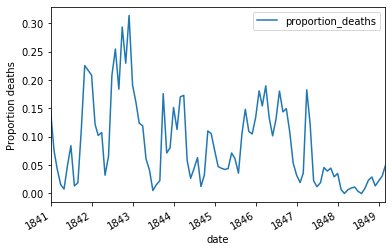

In [4]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

## 6. The effect of handwashing highlighted

Mulai dari musim panas 1847 proporsi kematian berkurang drastis dan, ya, ini adalah saat Semmelweis membuat cuci tangan wajib.

Efek cuci tangan menjadi lebih jelas jika kita menyoroti ini dalam grafik.

In [5]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] <= handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

Text(0, 0.5, 'Proportion deaths')

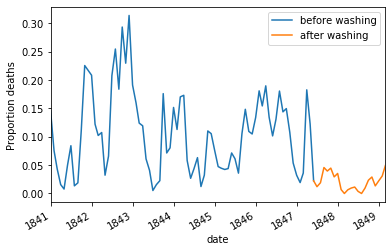

In [11]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='before washing')
after_washing.plot(x='date', y='proportion_deaths', label='after washing', ax=ax)
ax.set_ylabel('Proportion deaths')

## 7. More handwashing, fewer deaths?

Sekali lagi, grafik menunjukkan bahwa mencuci tangan memiliki efek yang sangat besar. Berapa banyak rata-rata mengurangi proporsi kematian setiap bulan?

In [12]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08288307604550094

## 8. A Bootstrap analysis of Semmelweis handwashing data

Ini mengurangi proporsi kematian sekitar 8 poin persentase! Dari 10% rata-rata menjadi hanya 2% (yang masih merupakan angka tinggi menurut standar modern).

Untuk merasakan ketidakpastian tentang seberapa banyak mencuci tangan mengurangi kematian kita bisa melihat interval kepercayaan (di sini dihitung menggunakan metode bootstrap).

In [13]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.100148
0.975   -0.065924
dtype: float64

## 9. The fate of Dr. Semmelweis

Jadi mencuci tangan mengurangi proporsi kematian antara **6.7** dan **10** poin persentase, menurut interval kepercayaan 95%. Secara keseluruhan, tampaknya Semmelweis memiliki bukti kuat bahwa mencuci tangan adalah prosedur sederhana namun sangat efektif yang dapat menyelamatkan banyak nyawa.

Tragisnya adalah bahwa, terlepas dari bukti, teori Semmelweis - bahwa demam persalinan disebabkan oleh beberapa "substansi" (yang sekarang kita kenal sebagai bakteri) dari mayat ruang otopsi - diejek oleh para ilmuwan kontemporer. Komunitas medis sebagian besar menolak penemuannya dan pada tahun 1849 ia terpaksa meninggalkan Rumah Sakit Umum Wina untuk selamanya.

Salah satu alasan untuk ini adalah bahwa statistik dan argumen statistik tidak umum dalam ilmu kedokteran pada 1800-an. Semmelweis hanya mempublikasikan datanya sebagai tabel data mentah yang panjang, tetapi ia tidak menunjukkan grafik atau interval kepercayaan. Jika dia memiliki akses ke analisis yang baru saja kita kumpulkan, dia mungkin akan lebih berhasil membuat dokter-dokter Wina mencuci tangan mereka.

Mengingat data yang dikumpulkan Semmelweis, apakah Benar atau Salah bahwa dokter harus mencuci tangan?

In [16]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True